### desenvolver um modelo por Pclass

In [97]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import cross_validation
%matplotlib inline
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
from matplotlib import pyplot as plt

In [217]:
train = pd.read_csv('../data/train_final.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,hasTitle,FamilyName,Title,FirstName,TitleClass,FamilySize,AgeClassDesc,AgeClass,SexClass,EmbarkedClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,...,Y,Braund,Mr,Owen Harris,1,2,Adulto,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,...,Y,Cumings,Mrs,John Bradley (Florence Briggs Thayer),3,2,Adulto,2,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,...,Y,Heikkinen,Miss,Laina,2,1,Adulto,2,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,...,Y,Futrelle,Mrs,Jacques Heath (Lily May Peel),3,2,Adulto,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,...,Y,Allen,Mr,William Henry,1,1,Adulto,2,0,0


In [7]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'hasTitle',
       'FamilyName', 'Title', 'FirstName', 'TitleClass', 'FamilySize',
       'AgeClassDesc', 'AgeClass', 'SexClass', 'EmbarkedClass'],
      dtype='object')

In [249]:
features_Pclass_1 = ["AgeClass", "SexClass", "Age"]
features_Pclass_2 = ["TitleClass", "FamilySize", "AgeClass", "SexClass", "Age"]
features_Pclass_3 = ["TitleClass", "FamilySize", "AgeClass", "SexClass", "EmbarkedClass", "Age", "Fare"]

In [44]:
train.groupby("Pclass").size()

Pclass
1    216
2    184
3    491
dtype: int64

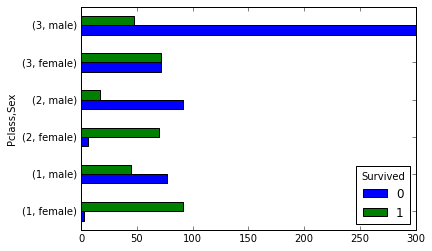

In [61]:
train.groupby(["Pclass", "Survived", "Sex"]).size().unstack(1).plot(kind="barh")

In [245]:
train_Pclass_1 = train[train["Pclass"] == 1]
train_Pclass_2 = train[train["Pclass"] == 2]
train_Pclass_3 = train[train["Pclass"] == 3]

## Analisando importância das features, por Pclass

(0, 35)

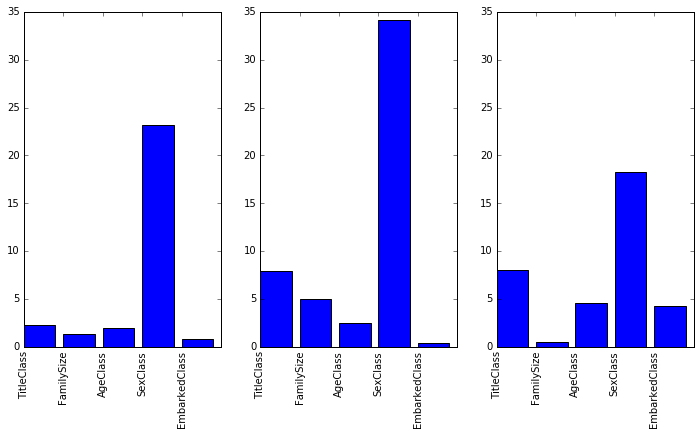

In [221]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

features = ["TitleClass", "FamilySize", "AgeClass", "SexClass", "EmbarkedClass"]

selector = SelectKBest(f_classif, k=5)
selector.fit(train_Pclass_1[features], train_Pclass_1["Survived"])
scores = -np.log10(selector.pvalues_)
ax1.bar(range(len(features)), scores)
ax1.set_xticks(range(len(features)))
ax1.set_xticklabels(features, rotation="vertical")
ax1.set_ylim([0, 35])

selector = SelectKBest(f_classif, k=5)
selector.fit(train_Pclass_2[features], train_Pclass_2["Survived"])
scores = -np.log10(selector.pvalues_)
ax2.bar(range(len(features)), scores)
ax2.set_xticks(range(len(features)))
ax2.set_xticklabels(features, rotation="vertical")
ax2.set_ylim([0, 35])

selector = SelectKBest(f_classif, k=5)
selector.fit(train_Pclass_3[features], train_Pclass_3["Survived"])
scores = -np.log10(selector.pvalues_)
ax3.bar(range(len(features)), scores)
ax3.set_xticks(range(len(features)))
ax3.set_xticklabels(features, rotation="vertical")
ax3.set_ylim([0, 35])

In [285]:
#rf_Pclass_1 = RandomForestClassifier(random_state=1, n_estimators=100, min_samples_split=6, min_samples_leaf=3)
rf_Pclass_1 = DecisionTreeClassifier(random_state=1, min_samples_split=10, min_samples_leaf=8)
rf_Pclass_2 = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=6, min_samples_leaf=4)
rf_Pclass_3 = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=6, min_samples_leaf=4)

In [286]:
scores_Pclass_1 = cross_validation.cross_val_score(rf_Pclass_1, train_Pclass_1[features_Pclass_1], train_Pclass_1["Survived"], cv=5)
scores_Pclass_2 = cross_validation.cross_val_score(rf_Pclass_2, train_Pclass_2[features_Pclass_2], train_Pclass_2["Survived"], cv=5)
scores_Pclass_3 = cross_validation.cross_val_score(rf_Pclass_3, train_Pclass_3[features_Pclass_3], train_Pclass_3["Survived"], cv=5)

In [287]:
scores_Pclass_1.mean(), scores_Pclass_2.mean(), scores_Pclass_3.mean()

(0.78245243128964059, 0.91842105263157892, 0.83720372247618202)

In [288]:
rf_Pclass_1.fit(train_Pclass_1[features_Pclass_1], train_Pclass_1["Survived"])
rf_Pclass_2.fit(train_Pclass_2[features_Pclass_2], train_Pclass_2["Survived"])
rf_Pclass_3.fit(train_Pclass_3[features_Pclass_3], train_Pclass_3["Survived"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=4, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [289]:
test = pd.read_csv("../data/test_final.csv")

In [290]:
test_Pclass_1 = test[test["Pclass"] == 1]
test_Pclass_2 = test[test["Pclass"] == 2]
test_Pclass_3 = test[test["Pclass"] == 3]

In [291]:
prediction_Pclass_1 = rf_Pclass_1.predict(test_Pclass_1[features_Pclass_1])
prediction_Pclass_2 = rf_Pclass_2.predict(test_Pclass_2[features_Pclass_2])
prediction_Pclass_3 = rf_Pclass_3.predict(test_Pclass_3[features_Pclass_3])

In [292]:
submission = pd.concat([\
           pd.DataFrame({"Survived": prediction_Pclass_1, "PassengerId": test_Pclass_1["PassengerId"]}),\
           pd.DataFrame({"Survived": prediction_Pclass_2, "PassengerId": test_Pclass_2["PassengerId"]}),\
           pd.DataFrame({"Survived": prediction_Pclass_3, "PassengerId": test_Pclass_3["PassengerId"]})\
           ])

In [293]:
submission.to_csv("../submissions/Pclass3 Random forest resto DecisTree - ajuste em features v4.csv", index=False)